# Histograma dos dados do ADCP da praia da Reserva

In [301]:
import os
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
%matplotlib qt

In [308]:
#leitura dos dados do ADCP (aguas rasas)

pathname = os.environ['HOME'] + '/Dropbox/reserva/dados/ADCP_Reef_Reserva/20150916/'
filename = 'ADCP_REEF_16_09_2015.wad'

dd = pd.read_table(pathname + filename, header=None, delim_whitespace=True, 
                   names=['burst_count','ens_count','pr','spare','an_input',
                          'vx','vy','vz','v_na','a1','a2','a3','a_na'])

dd = dd.loc[dd.burst_count == 2]
dd['pr'] = dd.pr - dd.pr.mean()


In [324]:
#leitura dos dados do PNBOIA (aguas profundas)

pathname = os.environ['HOME'] + '/Dropbox/database/historical/buoys/pnboia/rig/hne_rig/'
filename = '200905010000.HNE'

pnboia = pd.read_table(pathname + filename, skiprows=11, header=None, delim_whitespace=True, 
                      names=['time','hv','dn','de'])

pnboia = pnboia[:1024]
pnboia[:3]



,time,hv,dn,de
0,57.04,1.19,1.68,0.26
1,57.82,0.38,1.58,0.41
2,58.60,-0.52,1.04,0.33


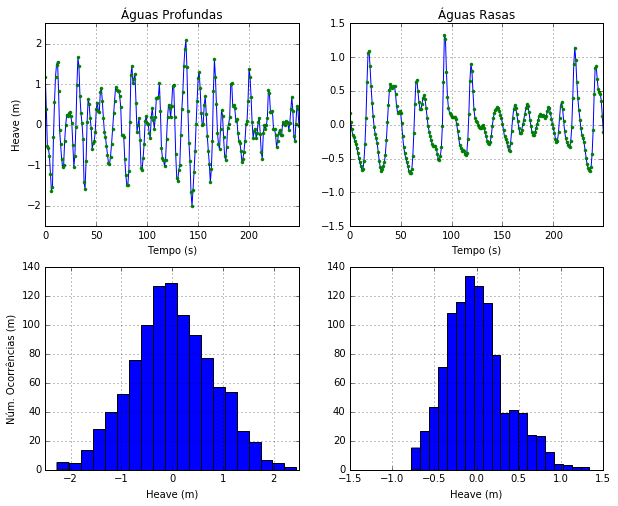

In [387]:
%matplotlib qt


pl.close('all')

pl.figure(figsize=(10,8))

pl.subplot(221)
pl.plot(np.arange(len(pnboia))[:250], pnboia.hv[:250])
pl.plot(np.arange(len(pnboia))[:250], pnboia.hv[:250],'.')
pl.xlabel('Tempo (s)')
pl.ylabel('Heave (m)')
pl.title('Águas Profundas')
pl.axis('tight')
pl.ylim(-2.5,2.5)
pl.grid()
pl.subplot(223)
pl.hist(pnboia.hv, 20)
pl.xlabel('Heave (m)')
pl.ylabel('Núm. Ocorrências (m)')
pl.grid()
pl.xlim(-2.5,2.5)

pl.subplot(222)
pl.plot(np.arange(len(dd))[:250], dd.pr[:250])
pl.plot(np.arange(len(dd))[:250], dd.pr[:250],'.')
pl.title('Águas Rasas')
pl.axis('tight')
pl.ylim(-1.5,1.5)
pl.xlabel('Tempo (s)')
pl.grid()
pl.subplot(224)
pl.hist(dd.pr, 20)
pl.grid()
pl.xlim(-1.5,1.5)
pl.xlabel('Heave (m)')

pl.savefig('fig/rasaprof.png')

# pl.show()

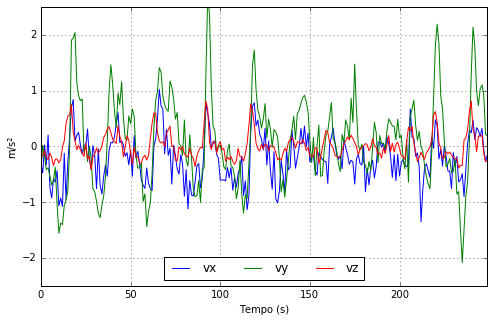

In [385]:
%matplotlib qt

pl.figure(figsize=(8,5))
# pl.plot(dd.pr[:100] - dd.pr.mean())
pl.plot(np.arange(len(dd))[:250], dd.vx[:250])
pl.plot(np.arange(len(dd))[:250], dd.vy[:250])
pl.plot(np.arange(len(dd))[:250], dd.vz[:250])
pl.legend(['vx','vy','vz'], loc=8, ncol=3)
pl.axis('tight')
pl.ylim(-2.5,2.5)
pl.grid()
pl.xlabel('Tempo (s)')
pl.ylabel('m/s²')
pl.savefig('fig/veloc.png')
# pl.show()